In [133]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline

In [134]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values

In [135]:
bank = pd.read_csv(r"D:\IMT\Term 4\MLAP\Dataset\bank.csv")

In [136]:
bank.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [137]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


# Dealing with imbalanced datasets

In [138]:
bank.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [139]:
# Importing resample from *sklearn.utils* package
from sklearn.utils import resample 

In [140]:
#seperating the subscribed and non-subscribed cases
bank_sub_no = bank[bank.subscribed == "no"]
bank_sub_yes = bank[bank.subscribed == "yes"]

In [141]:
# Upsample the yes-subscribed cases
minority_upsampled = resample(bank_sub_yes, replace=True, n_samples=2000)

In [142]:
# Combine majority class with upsampled minority class
new_bank = pd.concat([bank_sub_no, minority_upsampled])

In [143]:
from sklearn.utils import shuffle
new_bank = shuffle(new_bank)

In [144]:
new_bank.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [145]:
x_features = list( new_bank_df.columns)

In [146]:
x_features.remove('subscribed')

In [147]:
x_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [148]:
# Dummy variable filling
x = pd.get_dummies(new_bank[x_features], drop_first= True )

In [149]:
x

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
156,55,602,3,2,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
271,24,174,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
1527,57,63,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4463,33,920,1,4,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,55,1613,1,3,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3538,30,302,3,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3275,32,5878,2,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1832,40,-81,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [150]:
#Encoding the subscribed column and assigning to Y
y = new_bank.subscribed.map( lambda x: int( x == 'yes') )

In [151]:
y

156     1
271     1
1527    0
4463    0
3       0
       ..
1040    1
3538    1
3275    0
1832    0
2492    0
Name: subscribed, Length: 6000, dtype: int64

In [152]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split( x,
Y,
test_size = 0.3,
random_state = 93 )

In [153]:
import sklearn as sl

In [154]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

In [155]:
## Initializing the classifier
knn_clf = KNeighborsClassifier()

In [156]:
knn_clf.fit( train_x, train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [157]:
from sklearn import metrics # Code to import metrics

In [227]:
def draw_roc_curve (model, test_x, test_y):
    test_result = pd.DataFrame( { 'actual': test_y } )
    test_result = test_result.reset_index()
    Prob_predict = pd.DataFrame( model.predict_proba( test_x ) )
    test_result['chd_1'] = Prob_predict.iloc[:,1:2]
    fpr, tpr, thresholds = metrics.roc_curve( test_result.actual,
    test_result.chd_1,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( test_result.actual, test_result.chd_1 )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

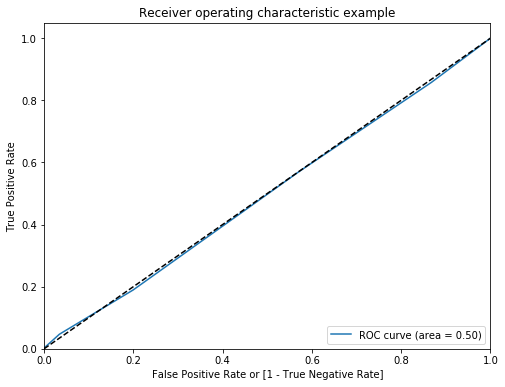

In [228]:
## Invoking draw_roc_curve with the KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_x, test_y )

In [229]:
from sklearn import metrics
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

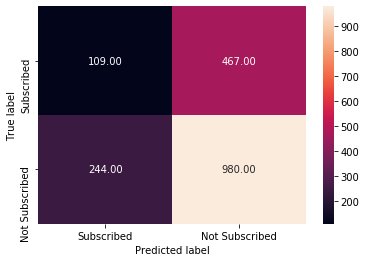

In [231]:
pred_y = knn_clf.predict(test_x)
draw_cm( test_y, pred_y )

In [232]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1224
           1       0.31      0.19      0.23       576

    accuracy                           0.60      1800
   macro avg       0.49      0.49      0.48      1800
weighted avg       0.56      0.60      0.57      1800

